In [2]:
import folium
import os
import matplotlib.pyplot as plt
import pandas as pd
import rasterio 
import numpy

In [18]:
map = folium.Map([40.808, -92.265], zoom_start=6)

folium.Marker(
    location=([41.152, -96.454])
).add_to(map)

folium.Marker(
    location=([40.007, -88.288])
).add_to(map)

folium.Marker(
    location=([39.837, -88.588]) 
).add_to(map)

folium.Marker(
    location=([39.721, -88.233])
).add_to(map)

folium.Marker(
    location=([39.724, -89.064])
).add_to(map)

folium.Marker(
    location=([39.055, -90.190])
).add_to(map)

folium.Marker(
    location=([39.890, -88.216])
).add_to(map)

folium.Marker(
    location=([39.886, -88.151])
).add_to(map)

map

In [33]:
df_loc = pd.read_csv('./data/U.S. Midwest fields/locations.csv')

df = df_loc[df_loc['site'] == 'IL-MC']

map = folium.Map([43.708, -80.265], zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker(
        location=(row['Y'], row['X']),
        radius=2,
        color="cornflowerblue"
    ).add_to(map)

map

IL-RS
-88.29399699 40.00733046
-88.29399699 40.00733046
-88.29359737 40.0073373
-88.29359737 40.0073373
-88.29319798 40.00733839
-88.29319798 40.00733839
-88.29279044 40.00733659
-88.29279044 40.00733659
-88.29239549 40.00733564
-88.29239549 40.00733564
-88.29198528 40.00733425999999
-88.29198528 40.00733425999999
-88.29159052 40.00732648999999
-88.29159052 40.00732648999999
-88.28993304 40.00731265999999
-88.28993304 40.00731265999999
-88.28952194 40.00730949
-88.28952194 40.00730949
-88.28910668 40.00730768
-88.28910668 40.00730768
-88.28870139 40.00730501999999
-88.28870139 40.00730501999999
-88.28829564 40.00730511
-88.28829564 40.00730511
-88.28788204 40.00730275999999
-88.28788204 40.00730275999999
-88.28747315 40.00730056
-88.28747315 40.00730056
-88.28706749 40.00730072999999
-88.28706749 40.00730072999999
-88.28665566 40.00729875999999
-88.28665566 40.00729875999999
-88.28624004 40.00725915
-88.28624004 40.00725915
-88.28582271 40.007209210000006
-88.28582271 40.00720921000000

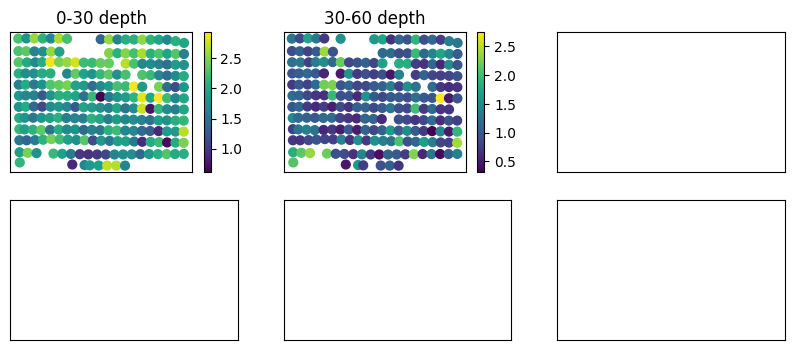

IL-RD
-88.2167952 39.89086884000001
-88.21636902 39.89087444
-88.21636902 39.89087444
-88.21594014 39.89087801
-88.21594014 39.89087801
-88.21551452 39.89089001
-88.21551452 39.89089001
-88.21508776 39.89089389
-88.21508776 39.89089389
-88.21466241 39.89089778000001
-88.21466241 39.89089778000001
-88.21423836 39.89090327000001
-88.21423836 39.89090327000001
-88.21381277 39.89090965
-88.21381277 39.89090965
-88.21338513 39.89091301
-88.21338513 39.89091301
-88.21295833 39.89091738
-88.21295833 39.89091738
-88.21253139 39.89092031999999
-88.21253139 39.89092031999999
-88.21210636 39.89092639
-88.21210636 39.89092639
-88.21167996 39.89093091
-88.21167996 39.89093091
-88.21125268 39.89093541999999
-88.21125268 39.89093541999999
-88.21082628 39.89094009
-88.21082628 39.89094009
-88.2104021 39.89094420000001
-88.2104021 39.89094420000001
-88.20997438 39.89094834
-88.20997438 39.89094834
-88.20954796 39.89095343
-88.20954796 39.89095343
-88.20912212000002 39.89095791999999
-88.20912212000002 

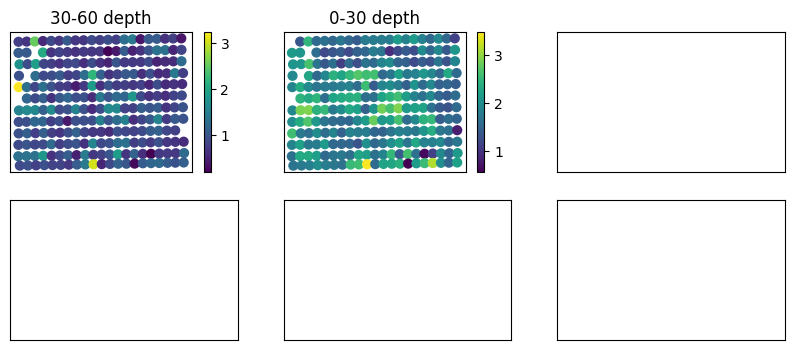

IL-DG
-88.5883415998 39.8358358173
-88.5883415998 39.8358358173
-88.5883415998 39.8358358173
-88.5883415998 39.8358358173
-88.5883415998 39.8358358173
-88.5883415998 39.8358358173
-88.5892449968 39.8358358173
-88.5892449968 39.8358358173
-88.5892449968 39.8358358173
-88.5892449968 39.8358358173
-88.5892449968 39.8358358173
-88.5892449968 39.8358358173
-88.5901501198 39.8358358173
-88.5901501198 39.8358358173
-88.5901501198 39.8358358173
-88.5901501198 39.8358358173
-88.5901501198 39.8358358173
-88.5901501198 39.8358358173
-88.5910340895 39.83583581730001
-88.5910340895 39.83583581730001
-88.5910340895 39.83583581730001
-88.5910340895 39.83583581730001
-88.5910340895 39.83583581730001
-88.5910340895 39.83583581730001
-88.5919301497 39.8358358173
-88.5919301497 39.8358358173
-88.5919301497 39.8358358173
-88.5919301497 39.8358358173
-88.5919301497 39.8358358173
-88.5919301497 39.8358358173
-88.5932873994 39.8360617091
-88.5932873994 39.8360617091
-88.5932873994 39.8360617091
-88.593287399

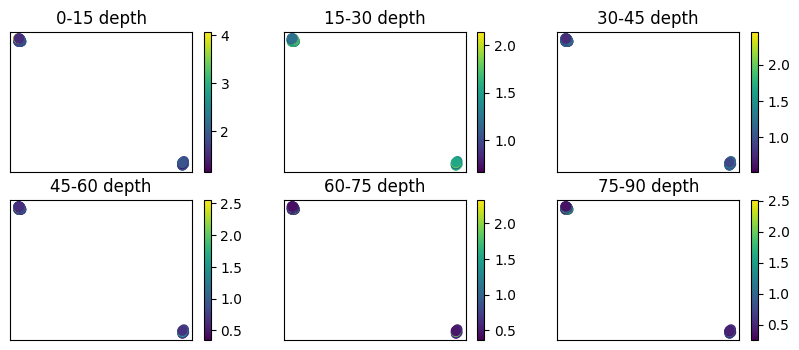

NE
-96.45448350951948 41.15229623106845
-96.45448350951948 41.15229623106845
-96.45448350951948 41.15229623106845
-96.45448350951948 41.15229623106845
-96.45448350951948 41.15229623106845
-96.45448350951948 41.15229623106845
-96.45470374102192 41.15229358906469
-96.45470374102192 41.15229358906469
-96.45470374102192 41.15229358906469
-96.45470374102192 41.15229358906469
-96.45470374102192 41.15229358906469
-96.45470374102192 41.15229358906469
-96.45469898901968 41.15207953658716
-96.45469898901968 41.15207953658716
-96.45469898901968 41.15207953658716
-96.45469898901968 41.15207953658716
-96.45469898901968 41.15207953658716
-96.45469898901968 41.15207953658716
-96.45437235610164 41.151905832467854
-96.45437235610164 41.151905832467854
-96.45437235610164 41.151905832467854
-96.45437235610164 41.151905832467854
-96.45437235610164 41.151905832467854
-96.45437235610164 41.151905832467854
-96.45446352938536 41.15184789035229
-96.45446352938536 41.15184789035229
-96.45446352938536 41.1518478

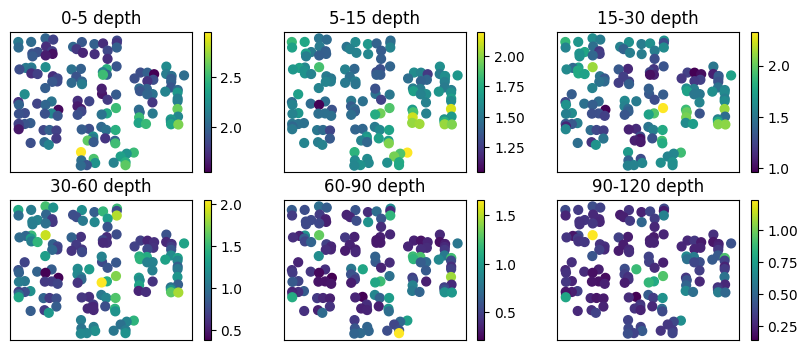

IL-BR
-90.19070581290642 39.05514698839897
-90.19070581290642 39.05514698839897
-90.19070581290642 39.05514698839897
-90.19070581290642 39.05514698839897
-90.19070581290642 39.05514698839897
-90.19028160883184 39.05515167084452
-90.19028160883184 39.05515167084452
-90.19028160883184 39.05515167084452
-90.19028160883184 39.05515167084452
-90.19028160883184 39.05515167084452
-90.18985740467892 39.05515635174003
-90.18985740467892 39.05515635174003
-90.18985740467892 39.05515635174003
-90.18985740467892 39.05515635174003
-90.18985740467892 39.05515635174003
-90.18918349120985 39.05536958535681
-90.18918349120985 39.05536958535681
-90.18918349120985 39.05536958535681
-90.18918349120985 39.05536958535681
-90.18918349120985 39.05536958535681
-90.1889339824354 39.05538134014544
-90.1889339824354 39.05538134014544
-90.1889339824354 39.05538134014544
-90.1889339824354 39.05538134014544
-90.1889339824354 39.05538134014544
-90.18868447360664 39.055393094486455
-90.18868447360664 39.05539309448645

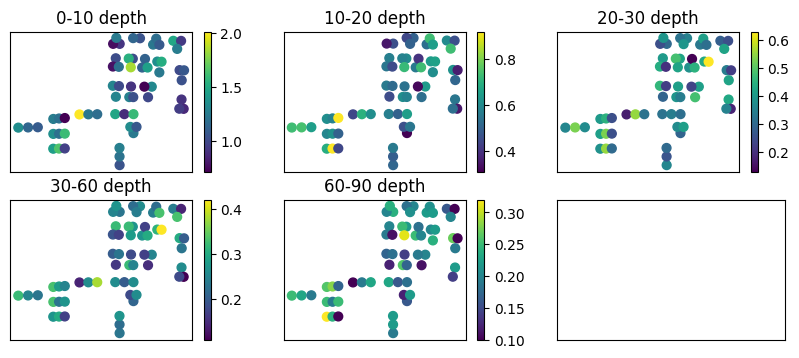

IL-MC
-88.5865390997 39.8358358173
-88.5865390997 39.8358358173
-88.5865390997 39.8358358173
-88.5865390997 39.8358358173
-88.5865390997 39.8358358173
-88.5874373198 39.8358358173
-88.5874373198 39.8358358173
-88.5874373198 39.8358358173
-88.5874373198 39.8358358173
-88.5874373198 39.8358358173
-88.5883415998 39.8358358173
-88.5883415998 39.8358358173
-88.5883415998 39.8358358173
-88.5883415998 39.8358358173
-88.5883415998 39.8358358173
-88.5892449968 39.8358358173
-88.5892449968 39.8358358173
-88.5892449968 39.8358358173
-88.5892449968 39.8358358173
-88.5892449968 39.8358358173
-88.5901501198 39.8358358173
-88.5901501198 39.8358358173
-88.5901501198 39.8358358173
-88.5901501198 39.8358358173
-88.5901501198 39.8358358173
-88.5910340895 39.83583581730001
-88.5910340895 39.83583581730001
-88.5910340895 39.83583581730001
-88.5910340895 39.83583581730001
-88.5910340895 39.83583581730001
-88.5919301497 39.8358358173
-88.5919301497 39.8358358173
-88.5919301497 39.8358358173
-88.5919301497 39

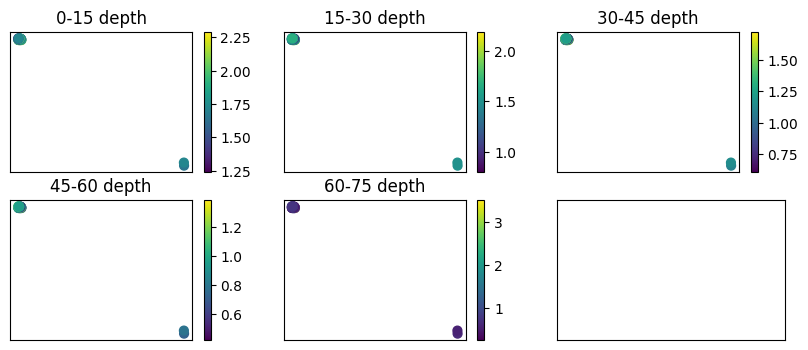

IL-PT
-88.5865390997 39.8358358173
-88.5923766607 39.8360617091
-88.5914832912 39.83606170910001
-88.5905873986 39.8360617091
-88.5896972134 39.8360617091
-88.5878875827 39.8360617091
-88.5869869711 39.8360617091
-88.5865390997 39.8362675705
-88.5874373198 39.836267570499984
-88.5883415998 39.8362675705
-88.5874373198 39.8358358173
-88.5892449968 39.8362675705
-88.5910340895 39.83626757049999
-88.5919301497 39.836267570499984
-88.5928236373 39.8362675705
-88.5932873994 39.83651987879999
-88.5923766607 39.8365198788
-88.5914832912 39.8365198788
-88.5905873986 39.8365198788
-88.5896972134 39.83651987879999
-88.5883415998 39.8358358173
-88.5887913179 39.8365198788
-88.5878875827 39.8365198788
-88.5883415998 39.83671407639999
-88.5892449968 39.83671407639999
-88.5901501198 39.8367140764
-88.5910340895 39.83671407639999
-88.5919301497 39.83671407639999
-88.5928236373 39.83671407639999
-88.5932873994 39.83693794559999
-88.5923766607 39.836937945600006
-88.5892449968 39.8358358173
-88.5914832

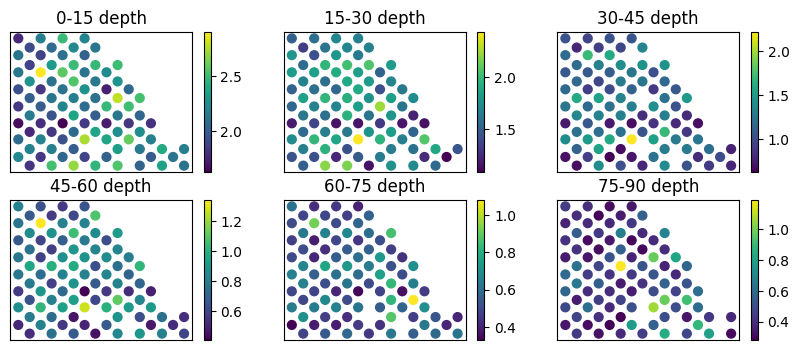

IL-RT
-88.15121812 39.886340440000005
-88.15121812 39.886340440000005
-88.15121461 39.88601225999999
-88.15121461 39.88601225999999
-88.15121364 39.885679
-88.15121364 39.885679
-88.15121382 39.88535061999999
-88.15121382 39.88535061999999
-88.15121695 39.885021900000005
-88.15121695 39.885021900000005
-88.15121769 39.88469215999999
-88.15121769 39.88469215999999
-88.15121607 39.88436304
-88.15121607 39.88436304
-88.15121513 39.88403542999999
-88.15121513 39.88403542999999
-88.15121505 39.88370667000001
-88.15121505 39.88370667000001
-88.15121501 39.883372
-88.15121501 39.883372
-88.15121403 39.88304102000001
-88.15121403 39.88304102000001
-88.15121324 39.88270901999999
-88.15121324 39.88270901999999
-88.15121406 39.88238211
-88.15121406 39.88238211
-88.15121416 39.88205255
-88.15121416 39.88205255
-88.15121694 39.88172093000001
-88.15121694 39.88172093000001
-88.15121431 39.88139136
-88.15121431 39.88139136
-88.15121776 39.88094308
-88.15121776 39.88094308
-88.15121462 39.880614659999

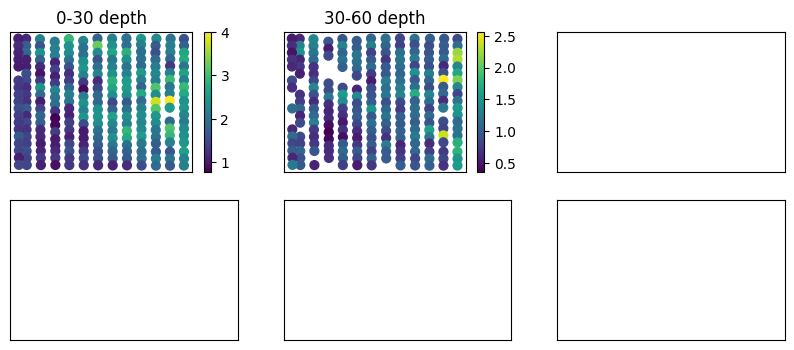

In [35]:
df_loc = pd.read_csv('./data/U.S. Midwest fields/locations.csv')
df_mes = pd.read_csv('./data/U.S. Midwest fields/measurements.csv')

sites_names = set(df_loc['site'])

for site in sites_names:
    print(site)

    fig, axs = plt.subplots(2, 3, figsize=(10, 4))
    size = 40

    sites = {}

    ds = df_mes[df_mes['site'] == site]
    
    for index, row in ds.iterrows():

        sample_depth_min = row['sample_depth_min']
        sample_depth_max = int(row['sample_depth_max'])

        key = str(sample_depth_min) + "-" + str(sample_depth_max)

        if key not in sites:
            sites[key] = {
                "X" : [],
                "Y" : [],
                "SOCc" : [],
                "BD" : []
            }


        row_loc = df_loc[df_loc['location_id'] == row['location_id']]

        X = row_loc['X'].iloc[0]
        Y = row_loc['Y'].iloc[0]

        print(X, Y)

        SOCc = row['SOCc']
        BD = row['BD']
        
        sites[key]['X'].append(X)
        sites[key]['Y'].append(Y)
        sites[key]['SOCc'].append(SOCc)
        sites[key]['BD'].append(SOCc)

    for key in list(sites.keys()):
        if len(sites[key]['X']) < 3:
            sites.pop(key)

    for i, key in enumerate(sites):
        riga = i // 3
        colonna = i % 3
        p = axs[riga, colonna].scatter(sites[key]['X'], sites[key]['Y'], s=size, c=sites[key]['SOCc'])
        axs[riga, colonna].set_title(key + " depth")
        plt.colorbar(p)

    for i in range(6):
        riga = i // 3
        colonna = i % 3
        axs[riga, colonna].xaxis.set_visible(False)
        axs[riga, colonna].yaxis.set_visible(False)

    plt.show()

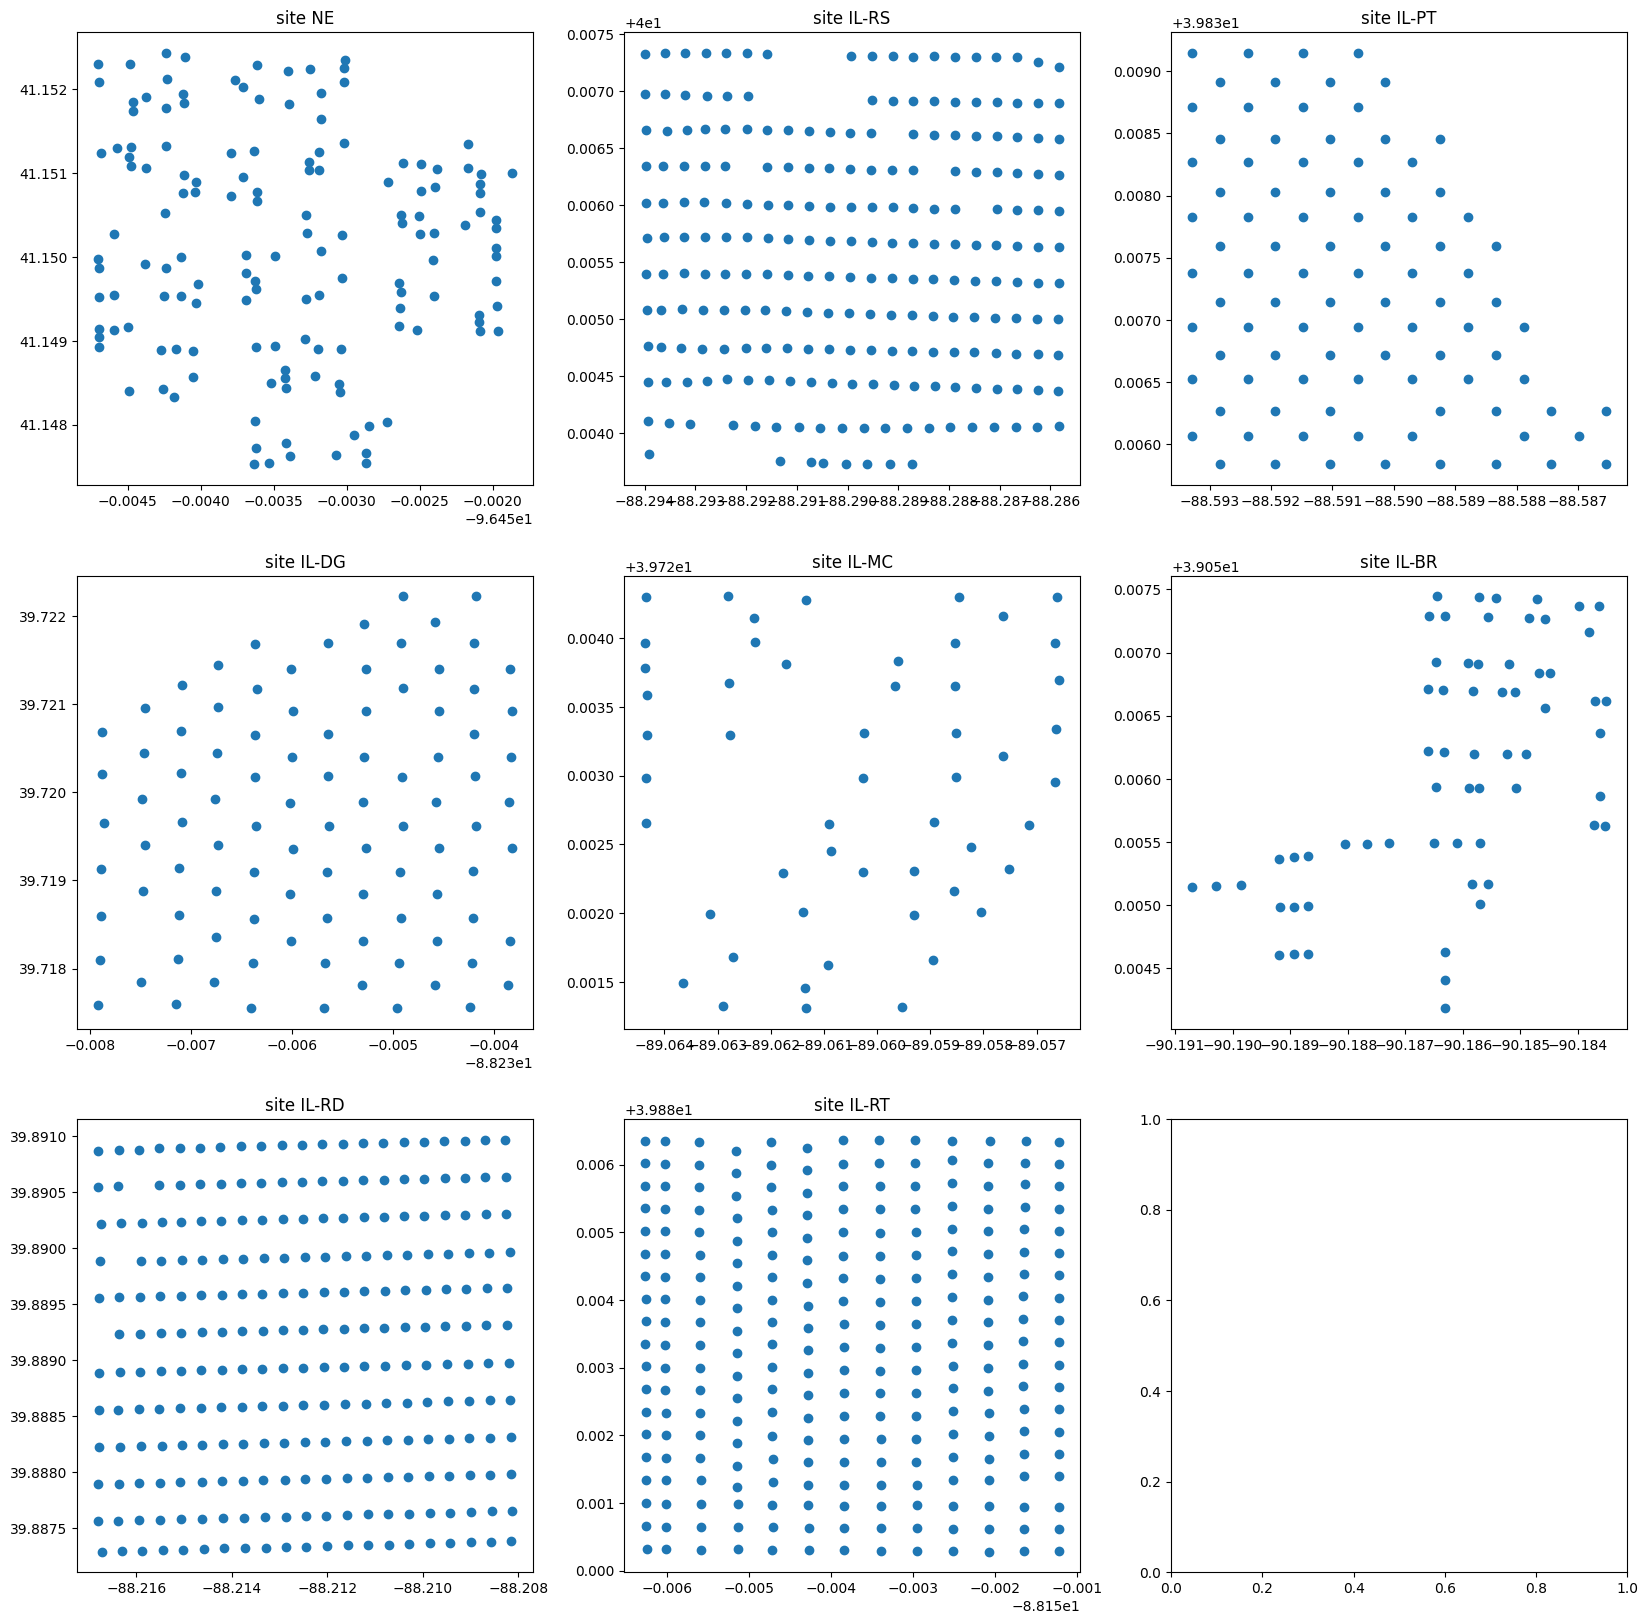

In [28]:
import matplotlib.pyplot as plt

sites = {}

for index in df_loc.index:
    site = df_loc['site'].iloc[index]
    x = df_loc['X'].iloc[index]
    y = df_loc['Y'].iloc[index]

    if site not in sites:
        sites[site] = {
            "x" : [],
            "y" : []
        }

    sites[site]["x"].append(x)
    sites[site]["y"].append(y)

figure, axes = plt.subplots(3, 3, figsize=(20, 20))

cont = 1
for site in sites:
    plt.subplot(3, 3, cont)
    plt.scatter(sites[site]['x'], sites[site]['y'])
    plt.title("site " + str(site))
    cont += 1

In [10]:
import pandas as pd

df_mea = pd.read_csv('./data/U.S. Midwest fields/measurements.csv')

df_mea

,site,location_id,sample_depth_min,sample_depth_max,SOCc,BD
0,NE,101A0001,0,5.0,2.039450,1.335931
1,NE,101A0001,5,15.0,1.725364,1.512957
2,NE,101A0001,15,30.0,1.678135,1.244744
3,NE,101A0001,30,60.0,1.076969,1.391142
4,NE,101A0001,60,90.0,0.553813,1.471202
...,...,...,...,...,...,...
3972,IL-RT,RT-M17,30,60.0,1.010000,1.200786
3973,IL-RT,RT-M18,0,30.0,1.060000,1.279252
3974,IL-RT,RT-M18,30,60.0,0.600000,1.168117
3975,IL-RT,RT-M19,0,30.0,1.450000,1.134687


In [20]:
sites = {}

for index in df_mea.index:
    site = df_mea['site'].iloc[index]
    sample_depth_min = df_mea['sample_depth_min'].iloc[index]
    sample_depth_max = int(df_mea['sample_depth_max'].iloc[index])
    SOCc = df_mea['SOCc'].iloc[index]
    BD = df_mea['BD'].iloc[index]

    if site not in sites:
        sites[site] = {}

    key = str(sample_depth_min) + "-" + str(sample_depth_max)

    if key not in sites[site]:
        sites[site][key] = {
            "SOCc" : [],
            "BD" : []
        }

    sites[site][key]['SOCc'].append(SOCc)
    sites[site][key]['BD'].append(SOCc)

for site in sites:
    print("site :", site)
    for key in sites[site]:
        print("in", key, "topsoil, mean SOCc is", 
              sum(sites[site][key]["SOCc"]) / len(sites[site][key]["SOCc"]),
              "and mean BD is", 
              sum(sites[site][key]["BD"]) / len(sites[site][key]["BD"]))
    print()

site : NE
in 0-5 topsoil, mean SOCc is 2.0201474154061163 and mean BD is 2.0201474154061163
in 5-15 topsoil, mean SOCc is 1.574658713405794 and mean BD is 1.574658713405794
in 15-30 topsoil, mean SOCc is 1.487958569462338 and mean BD is 1.487958569462338
in 30-60 topsoil, mean SOCc is 1.000143652921155 and mean BD is 1.000143652921155
in 60-90 topsoil, mean SOCc is 0.5765020878509611 and mean BD is 0.5765020878509611
in 90-120 topsoil, mean SOCc is 0.35731145503933226 and mean BD is 0.35731145503933226

site : IL-RS
in 0-30 topsoil, mean SOCc is 1.9104488888888902 and mean BD is 1.9104488888888902
in 30-60 topsoil, mean SOCc is 1.0838868778280542 and mean BD is 1.0838868778280542
in 30-56 topsoil, mean SOCc is 1.52 and mean BD is 1.52
in 30-58 topsoil, mean SOCc is 1.26 and mean BD is 1.26
in 30-49 topsoil, mean SOCc is 0.688 and mean BD is 0.688

site : IL-PT
in 0-15 topsoil, mean SOCc is 2.1570967741935485 and mean BD is 2.1570967741935485
in 15-30 topsoil, mean SOCc is 1.65956521739